In [1]:
from barrier3d import Barrier3d
from matplotlib import pyplot as plt
from cascade.outwasher import Outwasher
import numpy as np
import os
import copy

# Ki 7.5E-3

In [2]:
b3d = Barrier3d.from_yaml("C:/Users/Lexi/PycharmProjects/Barrier3d/tests/test_params/")
# years = np.load("C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/outwash_years.npy")

for t in range(1, 64):
    print('B3D time step: ', b3d._time_index)
    b3d.update()
    b3d.update_dune_domain()
outwash = Outwasher(
        datadir="C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/",
        outwash_years="outwash_years.npy",
        outwash_bay_levels="outwash_baylevels10.npy",
        time_step_count=b3d._TMAX,
        berm_elev=b3d._BermEl,
        barrier_length=b3d._BarrierLength,
        sea_level=b3d._SL,
        bay_depth=-b3d._BayDepth,
        interior_domain=b3d.InteriorDomain,
        dune_domain=b3d.DuneDomain[b3d._time_index - 1],
        block_size = 5,
        substep=20,
        sediment_flux_coefficient_Cx=10,
        sediment_flux_coefficient_Ki=7.5E-3,  # b3d = 7.5E-6 for inundation
        max_slope=-0.25,
        shoreface_on=True)
outwash.update(b3d)

B3D time step:  1
B3D time step:  2
B3D time step:  3
B3D time step:  4
B3D time step:  5
B3D time step:  6
B3D time step:  7
B3D time step:  8
B3D time step:  9
B3D time step:  10
B3D time step:  11
B3D time step:  12
B3D time step:  13
B3D time step:  14


c:\users\lexi\pycharmprojects\barrier3d\barrier3d\barrier3d.py:1360: RuntimeWarning: invalid value encountered in double_scalars
  Qs1 = Qs0 * Q1 / (Q1 + Q2 + Q3)
c:\users\lexi\pycharmprojects\barrier3d\barrier3d\barrier3d.py:1361: RuntimeWarning: invalid value encountered in double_scalars
  Qs2 = Qs0 * Q2 / (Q1 + Q2 + Q3)
c:\users\lexi\pycharmprojects\barrier3d\barrier3d\barrier3d.py:1362: RuntimeWarning: invalid value encountered in double_scalars
  Qs3 = Qs0 * Q3 / (Q1 + Q2 + Q3)


B3D time step:  15
B3D time step:  16
B3D time step:  17
B3D time step:  18
B3D time step:  19
B3D time step:  20
B3D time step:  21
B3D time step:  22
B3D time step:  23
B3D time step:  24
B3D time step:  25
B3D time step:  26
B3D time step:  27
B3D time step:  28
B3D time step:  29
B3D time step:  30
B3D time step:  31
B3D time step:  32
B3D time step:  33
B3D time step:  34
B3D time step:  35
B3D time step:  36
B3D time step:  37
B3D time step:  38
B3D time step:  39
B3D time step:  40
B3D time step:  41
B3D time step:  42
B3D time step:  43
B3D time step:  44
B3D time step:  45
B3D time step:  46
B3D time step:  47
B3D time step:  48
B3D time step:  49
B3D time step:  50
B3D time step:  51
B3D time step:  52
B3D time step:  53
B3D time step:  54
B3D time step:  55
B3D time step:  56
B3D time step:  57
B3D time step:  58
B3D time step:  59
B3D time step:  60
B3D time step:  61
B3D time step:  62
B3D time step:  63
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
2

In [14]:
round(outwash._Qs_shoreface[b3d._time_index-1]) # m^3

3870

In [20]:
round(outwash._Qs_shoreface_per_length[b3d._time_index-1]) # m^3/m

8

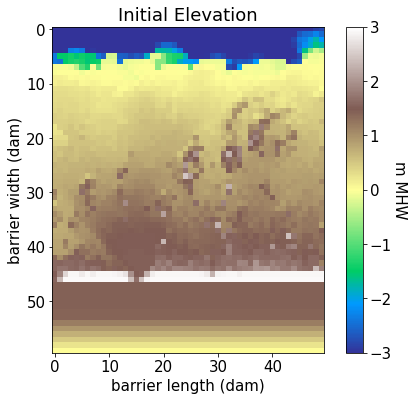

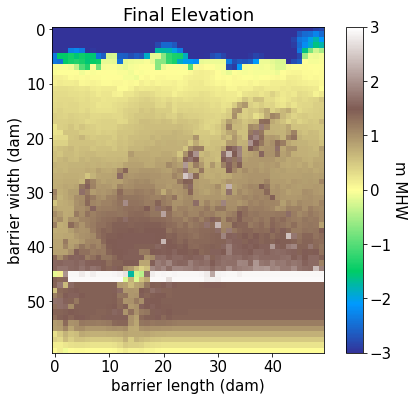

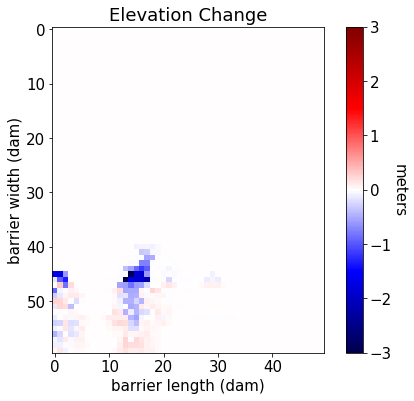

In [4]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({"font.size": 15})

initial_domain = outwash._initial_full_domain
final_domain = outwash._full_domain
domain_change = final_domain-initial_domain

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
mat = ax1.matshow(
    initial_domain*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax1.set_title("Initial Elevation")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain[:, :]*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("Final Elevation")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)

# plotting domain elevation change
domain_change = final_domain - initial_domain
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change*10,
    cmap="seismic",
    vmin=-3, vmax=3,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
cbar = fig3.colorbar(mat3)
cbar.set_label('meters', rotation=270, labelpad=15)

# Ki 7.5E-2, substep 20

In [5]:
b3d2 = Barrier3d.from_yaml("C:/Users/Lexi/PycharmProjects/Barrier3d/tests/test_params/")
# years = np.load("C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/outwash_years.npy")

for t in range(1, 64):
    print('B3D time step: ', b3d2._time_index)
    b3d2.update()
    b3d2.update_dune_domain()
outwash2 = Outwasher(
        datadir="C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/",
        outwash_years="outwash_years.npy",
        outwash_bay_levels="outwash_baylevels10.npy",
        time_step_count=b3d2._TMAX,
        berm_elev=b3d2._BermEl,
        barrier_length=b3d2._BarrierLength,
        sea_level=b3d2._SL,
        bay_depth=-b3d2._BayDepth,
        interior_domain=b3d2.InteriorDomain,
        dune_domain=b3d2.DuneDomain[b3d2._time_index - 1],
        block_size = 5,
        substep=20,
        sediment_flux_coefficient_Cx=10,
        sediment_flux_coefficient_Ki=7.5E-2,  # b3d = 7.5E-6 for inundation
        max_slope=-0.25,
        shoreface_on=True)
outwash2.update(b3d2)

B3D time step:  1
B3D time step:  2
B3D time step:  3
B3D time step:  4
B3D time step:  5
B3D time step:  6
B3D time step:  7
B3D time step:  8
B3D time step:  9
B3D time step:  10
B3D time step:  11
B3D time step:  12
B3D time step:  13
B3D time step:  14
B3D time step:  15
B3D time step:  16
B3D time step:  17
B3D time step:  18
B3D time step:  19
B3D time step:  20
B3D time step:  21
B3D time step:  22
B3D time step:  23
B3D time step:  24
B3D time step:  25
B3D time step:  26
B3D time step:  27
B3D time step:  28
B3D time step:  29
B3D time step:  30
B3D time step:  31
B3D time step:  32
B3D time step:  33
B3D time step:  34
B3D time step:  35
B3D time step:  36
B3D time step:  37
B3D time step:  38
B3D time step:  39
B3D time step:  40
B3D time step:  41
B3D time step:  42
B3D time step:  43
B3D time step:  44
B3D time step:  45
B3D time step:  46
B3D time step:  47
B3D time step:  48
B3D time step:  49
B3D time step:  50
B3D time step:  51
B3D time step:  52
B3D time step:  53
B3

In [17]:
round(outwash2._Qs_shoreface[b3d2._time_index-1]) # m^3

11488

In [21]:
round(outwash2._Qs_shoreface_per_length[b3d._time_index-1]) # m^3/m

23

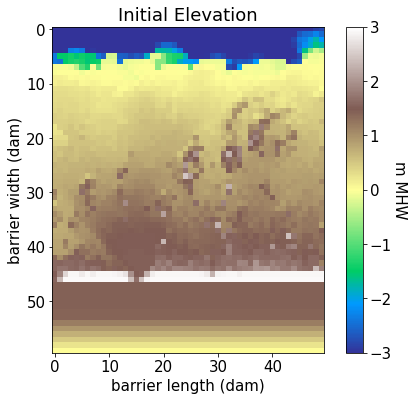

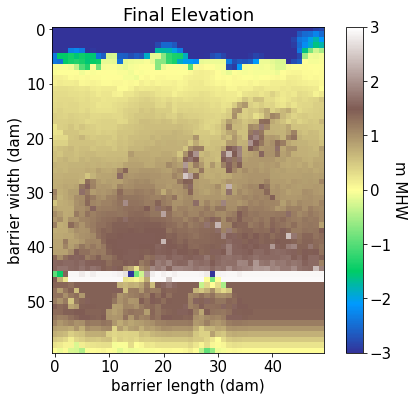

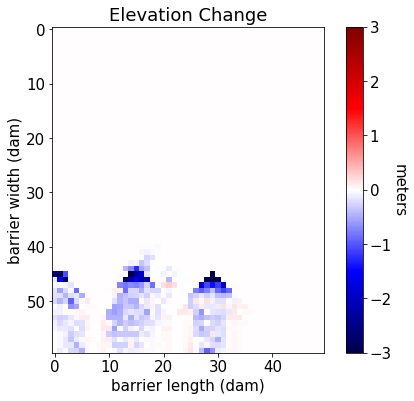

In [7]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({"font.size": 15})

initial_domain = outwash2._initial_full_domain
final_domain = outwash2._full_domain
domain_change = final_domain-initial_domain

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
mat = ax1.matshow(
    initial_domain*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax1.set_title("Initial Elevation")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain[:, :]*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("Final Elevation")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)

# plotting domain elevation change
domain_change = final_domain - initial_domain
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change*10,
    cmap="seismic",
    vmin=-3, vmax=3,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
cbar = fig3.colorbar(mat3)
cbar.set_label('meters', rotation=270, labelpad=15)

# Ki 7.5E-1, substep 20

In [8]:
b3d3 = Barrier3d.from_yaml("C:/Users/Lexi/PycharmProjects/Barrier3d/tests/test_params/")
# years = np.load("C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/outwash_years.npy")

for t in range(1, 64):
    print('B3D time step: ', b3d3._time_index)
    b3d3.update()
    b3d3.update_dune_domain()
outwash3 = Outwasher(
        datadir="C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/",
        outwash_years="outwash_years.npy",
        outwash_bay_levels="outwash_baylevels10.npy",
        time_step_count=b3d3._TMAX,
        berm_elev=b3d3._BermEl,
        barrier_length=b3d3._BarrierLength,
        sea_level=b3d3._SL,
        bay_depth=-b3d3._BayDepth,
        interior_domain=b3d3.InteriorDomain,
        dune_domain=b3d3.DuneDomain[b3d3._time_index - 1],
        block_size = 5,
        substep=20,
        sediment_flux_coefficient_Cx=10,
        sediment_flux_coefficient_Ki=7.5E-1,  # b3d = 7.5E-6 for inundation
        max_slope=-0.25,
        shoreface_on=True)
outwash3.update(b3d3)

B3D time step:  1
B3D time step:  2
B3D time step:  3
B3D time step:  4
B3D time step:  5
B3D time step:  6
B3D time step:  7
B3D time step:  8
B3D time step:  9
B3D time step:  10
B3D time step:  11
B3D time step:  12
B3D time step:  13
B3D time step:  14
B3D time step:  15
B3D time step:  16
B3D time step:  17
B3D time step:  18
B3D time step:  19
B3D time step:  20
B3D time step:  21
B3D time step:  22
B3D time step:  23
B3D time step:  24
B3D time step:  25
B3D time step:  26
B3D time step:  27
B3D time step:  28
B3D time step:  29
B3D time step:  30
B3D time step:  31
B3D time step:  32
B3D time step:  33
B3D time step:  34
B3D time step:  35
B3D time step:  36
B3D time step:  37
B3D time step:  38
B3D time step:  39
B3D time step:  40
B3D time step:  41
B3D time step:  42
B3D time step:  43
B3D time step:  44
B3D time step:  45
B3D time step:  46
B3D time step:  47
B3D time step:  48
B3D time step:  49
B3D time step:  50
B3D time step:  51
B3D time step:  52
B3D time step:  53
B3

In [18]:
round(outwash3._Qs_shoreface[b3d3._time_index-1]) # m^3

12321

In [22]:
round(outwash3._Qs_shoreface_per_length[b3d._time_index-1]) # m^3/m

25

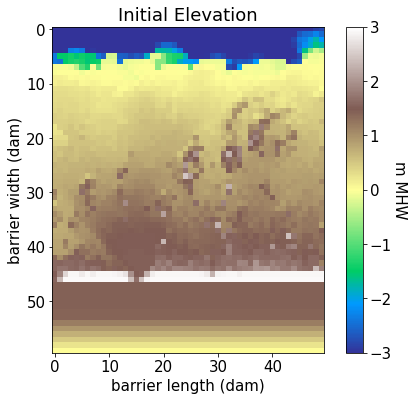

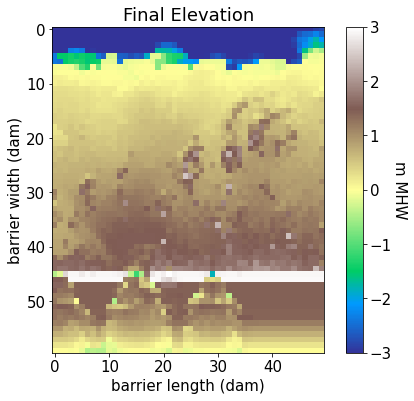

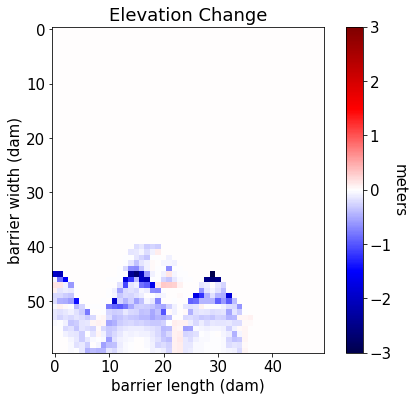

In [10]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({"font.size": 15})

initial_domain = outwash3._initial_full_domain
final_domain = outwash3._full_domain
domain_change = final_domain-initial_domain

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
mat = ax1.matshow(
    initial_domain*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax1.set_title("Initial Elevation")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain[:, :]*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("Final Elevation")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)

# plotting domain elevation change
domain_change = final_domain - initial_domain
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change*10,
    cmap="seismic",
    vmin=-3, vmax=3,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
cbar = fig3.colorbar(mat3)
cbar.set_label('meters', rotation=270, labelpad=15)